In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
google = pd.read_csv("GOOG.csv", index_col = 'date')[::-1] #date order backwards
apple = pd.read_csv("AAPL.csv", index_col = 'date')[::-1]
amazon = pd.read_csv("AMZN.csv", index_col = 'date')[::-1]
microsoft = pd.read_csv("MSFT.csv", index_col = 'date')[::-1]
walmart = pd.read_csv("Walmart.csv", index_col = 'date')[::-1]

In [3]:
walmart.drop(walmart.index[-1], inplace=True)
walmart.head(5)

,close,volume,open,high,low
date,,,,,
2014/02/10,73.76,6204086.0000,73.59,73.760,72.96
2014/02/11,74.80,6511228.0000,73.90,74.850,73.67
2014/02/12,74.96,5339771.0000,74.22,75.180,74.22
2014/02/13,75.36,5250165.0000,74.68,75.490,74.56
2014/02/14,75.79,4919940.0000,75.40,75.985,75.10


# 5 years stock price

In [4]:
#walmart = walmart.astype(float)
#list comprehension--> returning each element back to walmart volume column
walmart['volume'] =[float(each) for each in walmart['volume']] 


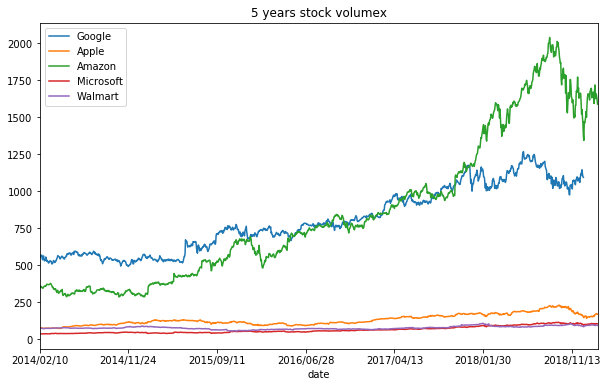

In [5]:
google['close'].plot(figsize=(10,6), label="Google", title="5 years stock volumex")
apple['close'].plot(label = "Apple")
amazon['close'].plot(label="Amazon")
microsoft['close'].plot(label="Microsoft")
walmart['close'].plot(label="Walmart")
plt.legend()

## 5 years trade volume

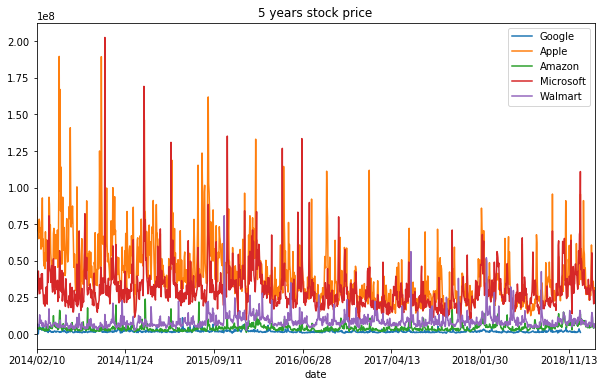

In [6]:
google['volume'].plot(figsize=(10,6), label="Google", title="5 years stock price")
apple['volume'].plot(label = "Apple")
amazon['volume'].plot(label="Amazon")
microsoft['volume'].plot(label="Microsoft")
walmart['volume'].plot(label="Walmart")
plt.legend()

In [7]:
microsoft['volume'].argmax() #date of the highest stock owned by Microsoft

'2014/09/19'

# Total trade values in 5 years

In [8]:
google['total trade'] = google['open']*google['volume']
microsoft['total trade'] = microsoft['open']*microsoft['volume']
amazon['total trade'] = amazon['open']*amazon['volume']
apple['total trade'] = apple['open']*apple['volume']
walmart['total trade'] = walmart['open']*walmart['volume']

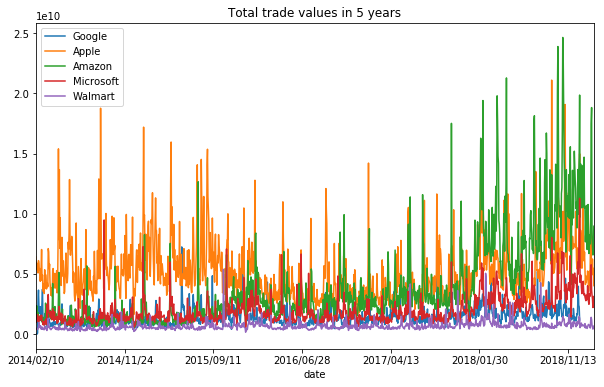

In [9]:
google['total trade'].plot(figsize=(10,6), label="Google", title="Total trade values in 5 years")
apple['total trade'].plot(label = "Apple")
amazon['total trade'].plot(label="Amazon")
microsoft['total trade'].plot(label="Microsoft")
walmart['total trade'].plot(label="Walmart")
plt.legend()

In [10]:
amazon['total trade'].max()

24647942837.399998

In [11]:
amazon['total trade'].argmax()

'2018/10/26'

# Trends

## Google

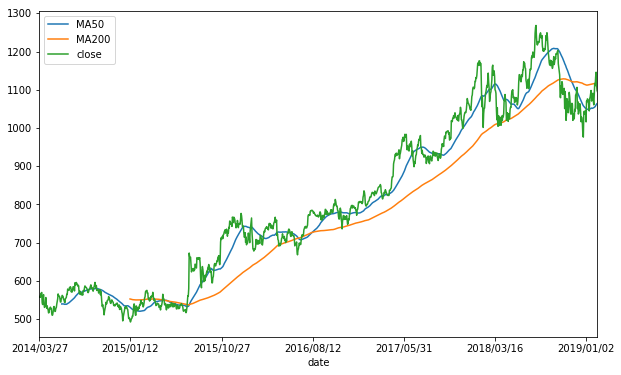

In [12]:
google['MA50'] = google['close'].rolling(50).mean()
google['MA200'] = google['close'].rolling(200).mean()
google[['MA50','MA200','close']].plot(figsize=(10,6))

## Apple

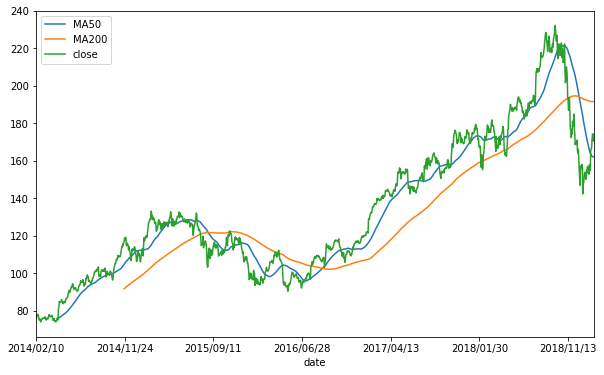

In [13]:
apple['MA50'] = apple['close'].rolling(50).mean()
apple['MA200'] = apple['close'].rolling(200).mean()
apple[['MA50', 'MA200','close']].plot(figsize=(10,6))

## Microsoft

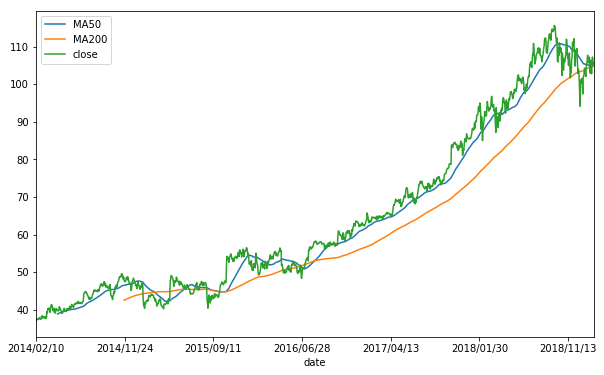

In [14]:
microsoft['MA50'] = microsoft['close'].rolling(50).mean()
microsoft['MA200'] = microsoft['close'].rolling(200).mean()
microsoft[['MA50', 'MA200','close']].plot(figsize=(10,6))

## Amazon

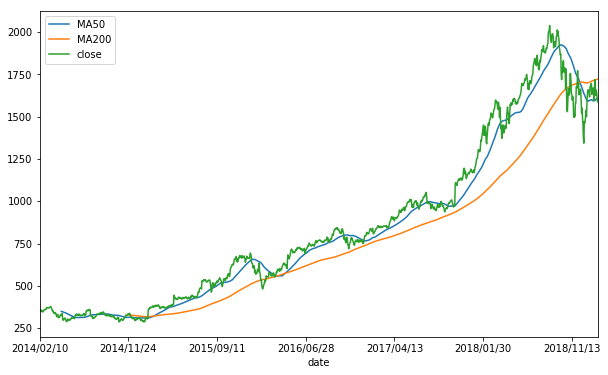

In [15]:
amazon['MA50'] = amazon['close'].rolling(50).mean()
amazon['MA200'] = amazon['close'].rolling(200).mean()
amazon[['MA50', 'MA200', 'close']].plot(figsize=(10,6))

## Walmart

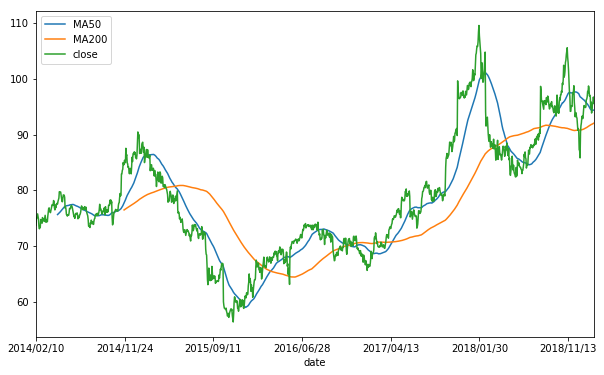

In [16]:
walmart['MA50'] = walmart['close'].rolling(50).mean()
walmart['MA200'] = walmart['close'].rolling(200).mean()
walmart[['MA50','MA200','close']].plot(figsize=(10,6))

## Correlations

In [17]:
from pandas.plotting import scatter_matrix


In [18]:
all_company = pd.concat([google['close'], 
                         amazon['close'], 
                         apple['close'], 
                         walmart['close'], 
                         microsoft['close']], axis=1) #to merge different columns into a dataset

all_company.columns = ["Google","Amazon","Apple","Walmart","Microsoft"]

In [19]:
all_company.head()

,Google,Amazon,Apple,Walmart,Microsoft
2014/02/10,NaN,360.87,75.5700,73.76,36.800
2014/02/11,NaN,361.79,76.5657,74.80,37.175
2014/02/12,NaN,349.25,76.5600,74.96,37.470
2014/02/13,NaN,357.20,77.7757,75.36,37.610
2014/02/14,NaN,357.35,77.7128,75.79,37.620


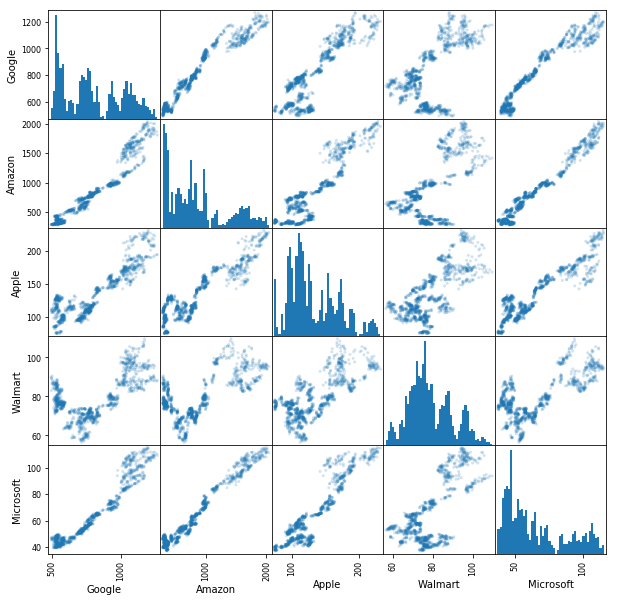

In [20]:
scatter_matrix(all_company, alpha=0.2, figsize=(10,10), hist_kwds ={'bins':50})
plt.show() #shows only the chart without data texts

if a direction of scatters = ↗️, positive growth between two brands, ↘️ = negative growth

# Candlestick Chart

In [21]:
from mpl_finance import candlestick_ochl
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
from datetime import datetime


In [22]:
index0 = google.index[0]
datetime.strptime(index0, '%Y/%m/%d')

datetime.datetime(2014, 3, 27, 0, 0)

In [23]:
#Get new dataframe for Jan 2019
google_30days = google.iloc[-30:-1]

In [24]:
google_30days["date_axis"] = [datetime.strptime(each, "%Y/%m/%d") for each in google_30days.index]

In [25]:
google_30days["date_axis"]=[date2num(each) for each in google_30days["date_axis"]]
google_30days.head()

,close,volume,open,high,low,total trade,MA50,MA200,date_axis
date,,,,,,,,,
2018/12/27,1043.88,2102069.0,1017.15,1043.89,997.00,2.138119e+09,1055.8954,1114.45965,737055.0
2018/12/28,1037.08,1399218.0,1049.62,1055.56,1033.10,1.468647e+09,1054.2114,1113.89760,737056.0
2018/12/31,1035.61,1492541.0,1050.96,1052.70,1023.59,1.568601e+09,1052.6098,1113.32775,737059.0
2019/01/02,1045.85,1516681.0,1016.57,1052.32,1015.71,1.541812e+09,1051.7674,1112.87835,737061.0
2019/01/03,1016.06,1829379.0,1041.00,1056.98,1014.07,1.904384e+09,1050.1594,1112.45955,737062.0


In [26]:


#date2num(datetime.strptime(google_jan_2019.index[1], "%Y/%m/%d"))
date_for_convert = [datetime.strptime(each, "%Y/%m/%d") for each in google_jan_2019.index]
google_jan_2019["date_axes"]=[date2num(each) for each in date_for_convert]
gg_jan_values =[tuple(vals) for vals in google_jan_2019[['date_axes','open','close','high','low']].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
WeekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots(figsize = (16,8))
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(WeekFormatter)

candlestick_ochl(ax, gg_jan_values, width=0.6, colorup='g', colordown='r')
plt.show()


NameError: name 'google_jan_2019' is not defined

# Daily returns

$r_t = \frac{p_t}{p_{t-1}}-1$

## Google

In [28]:
google['daily returns'] = (google['close']/google['close'].shift(1))-1 
#shift means google close upper row(yesterday)

In [ ]:
google.head()

In [ ]:
google['daily returns'].hist(bins=50)
#50 graphs

## Apple

In [32]:
apple['daily returns']=(apple['close']/apple['close'].shift(1))-1
apple.head()

,close,volume,open,high,low,total trade,MA50,MA200,daily returns
date,,,,,,,,,
2014/02/10,75.5700,86342646.0,74.0943,75.9985,74.0000,6.397498e+09,NaN,NaN,NaN
2014/02/11,76.5657,70489461.0,75.8014,76.8214,75.6428,5.343200e+09,NaN,NaN,0.013176
2014/02/12,76.5600,76994423.0,76.7071,77.0800,76.1771,5.906019e+09,NaN,NaN,-0.000074
2014/02/13,77.7757,76790093.0,76.3800,77.8357,76.3143,5.865227e+09,NaN,NaN,0.015879
2014/02/14,77.7128,68395257.0,77.4957,77.9971,77.3157,5.300338e+09,NaN,NaN,-0.000809


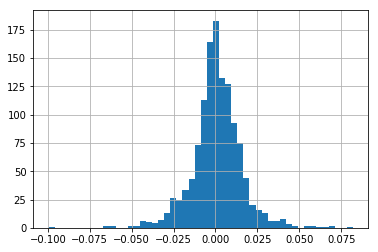

In [33]:
apple['daily returns'].hist(bins=50)

## Walmart

In [34]:
walmart['daily returns']=(walmart['close']/walmart['close'].shift(1))-1
walmart.head()

,close,volume,open,high,low,total trade,MA50,MA200,daily returns
date,,,,,,,,,
2014/02/10,73.76,6204086.0,73.59,73.760,72.96,4.565587e+08,NaN,NaN,NaN
2014/02/11,74.80,6511228.0,73.90,74.850,73.67,4.811797e+08,NaN,NaN,0.014100
2014/02/12,74.96,5339771.0,74.22,75.180,74.22,3.963178e+08,NaN,NaN,0.002139
2014/02/13,75.36,5250165.0,74.68,75.490,74.56,3.920823e+08,NaN,NaN,0.005336
2014/02/14,75.79,4919940.0,75.40,75.985,75.10,3.709635e+08,NaN,NaN,0.005706


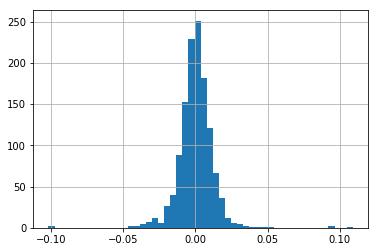

In [35]:
walmart['daily returns'].hist(bins=50)

## Microsoft

In [36]:
microsoft['daily returns']=(microsoft['close']/microsoft['close'].shift(1))-1
microsoft.head()

,close,volume,open,high,low,total trade,MA50,MA200,daily returns
date,,,,,,,,,
2014/02/10,36.800,26735870.0,36.63,36.80,36.29,9.793349e+08,NaN,NaN,NaN
2014/02/11,37.175,32133250.0,36.88,37.26,36.86,1.185074e+09,NaN,NaN,0.010190
2014/02/12,37.470,27051620.0,37.35,37.60,37.30,1.010378e+09,NaN,NaN,0.007935
2014/02/13,37.610,37635520.0,37.33,37.86,37.33,1.404934e+09,NaN,NaN,0.003736
2014/02/14,37.620,42985490.0,37.39,37.78,37.33,1.607227e+09,NaN,NaN,0.000266


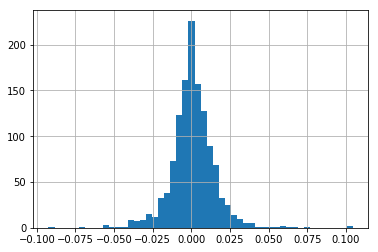

In [37]:
microsoft['daily returns'].hist(bins=50)

## Amazon

In [38]:
amazon['daily returns']=(amazon['close']/amazon['close'].shift(1))-1
amazon.head()

,close,volume,open,high,low,total trade,MA50,MA200,daily returns
date,,,,,,,,,
2014/02/10,360.87,3447970.0,361.610,365.00,359.35,1.246820e+09,NaN,NaN,NaN
2014/02/11,361.79,3220432.0,361.842,363.61,356.25,1.165288e+09,NaN,NaN,0.002549
2014/02/12,349.25,6586835.0,356.430,357.75,346.32,2.347746e+09,NaN,NaN,-0.034661
2014/02/13,357.20,4174300.0,347.700,357.20,346.50,1.451404e+09,NaN,NaN,0.022763
2014/02/14,357.35,3522810.0,359.340,359.34,353.35,1.265887e+09,NaN,NaN,0.000420


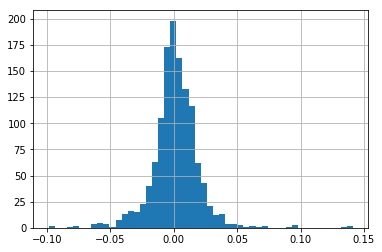

In [39]:
amazon['daily returns'].hist(bins=50)

# Histograms in one chart

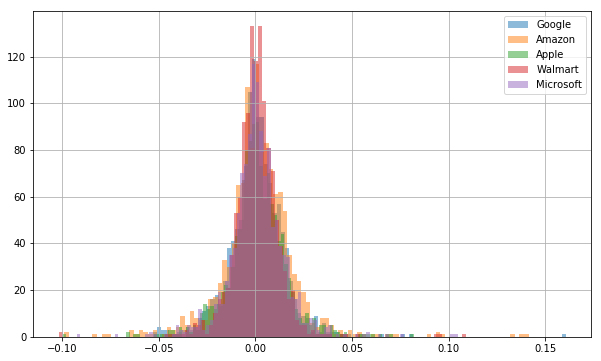

In [40]:
google['daily returns'].hist(bins=100, figsize=(10,6), alpha=0.5, label="Google")
amazon['daily returns'].hist(bins=100, label="Amazon", alpha=0.5)
apple['daily returns'].hist(bins=100, label="Apple", alpha=0.5)
walmart['daily returns'].hist(bins=100, label="Walmart",alpha=0.5)
microsoft['daily returns'].hist(bins=100, label="Microsoft", alpha=0.5)
plt.legend() #legend shows color indiation of each graph

## Kernel Density Estimate (kde)

## Google

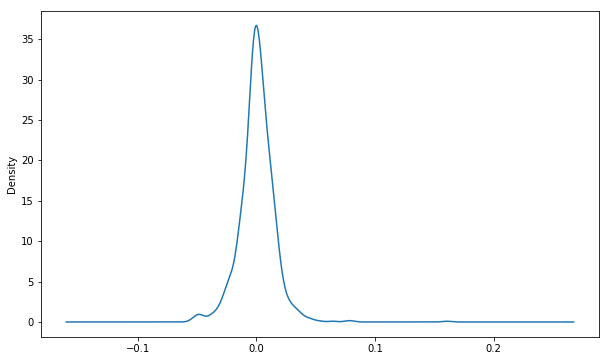

In [41]:
google['daily returns'].plot(kind="kde",label="Google",figsize=(10,6))

## Amazon

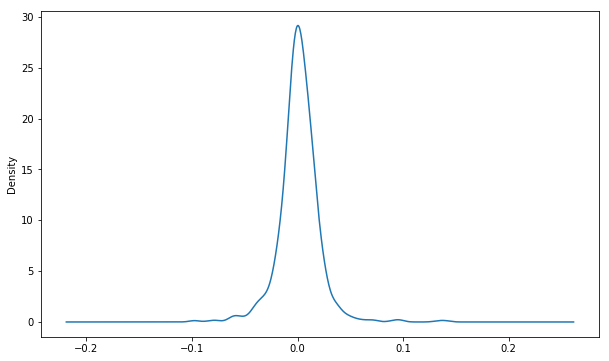

In [42]:
amazon['daily returns'].plot(kind="kde", label="Amazon", figsize=(10,6))

## Apple

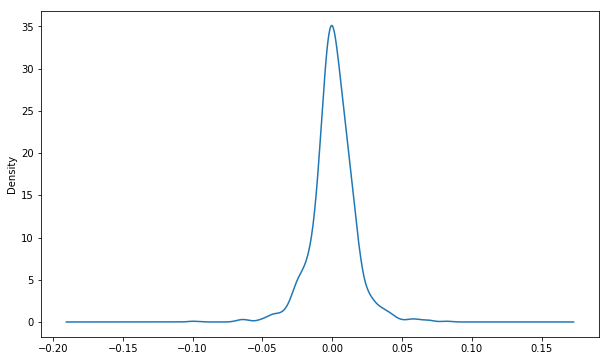

In [43]:
apple['daily returns'].plot(kind="kde", label="Apple", figsize=(10,6))

## Microsoft

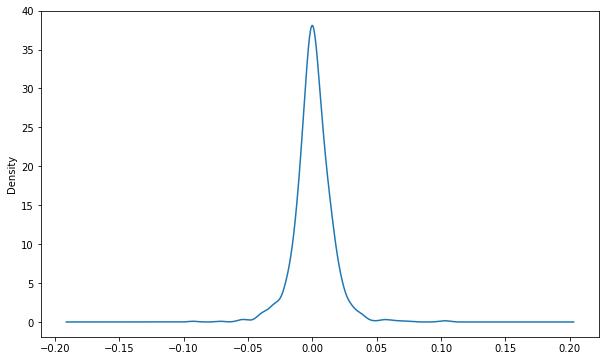

In [44]:
microsoft['daily returns'].plot(kind="kde", label="Microsoft", figsize=(10,6))

## Walmart

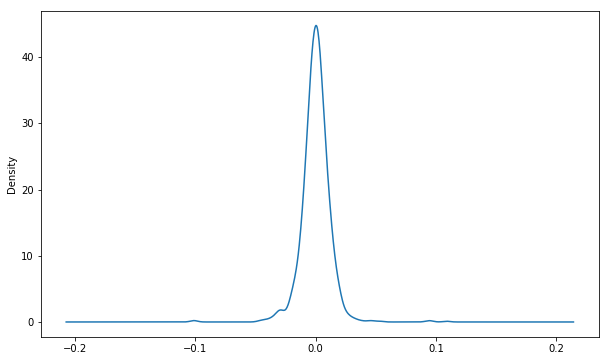

In [48]:
walmart['daily returns'].plot(kind="kde",label="Walmart",figsize=(10,6))

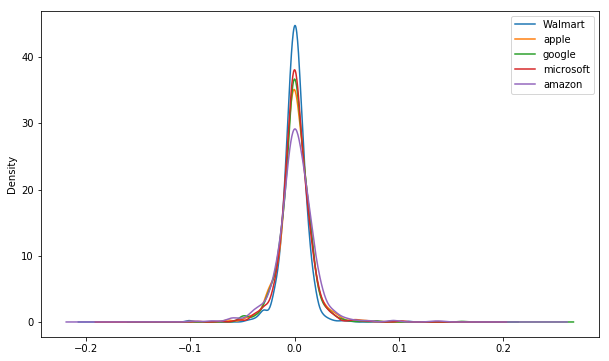

In [47]:
walmart['daily returns'].plot(kind="kde",label="Walmart",figsize=(10,6))
apple['daily returns'].plot(kind="kde",label="apple")
google['daily returns'].plot(kind="kde",label="google")
microsoft['daily returns'].plot(kind="kde",label="microsoft")
amazon['daily returns'].plot(kind="kde",label="amazon")
plt.legend()

# Box plots

In [55]:
#concat = merging together
daily_returns = pd.concat([google['daily returns'], 
                         amazon['daily returns'],
                         apple['daily returns'],
                         microsoft['daily returns'],
                         walmart['daily returns']], axis=1)
daily_returns.columns = ["Google","Amazon","Apple","Microsoft","Walmart"]

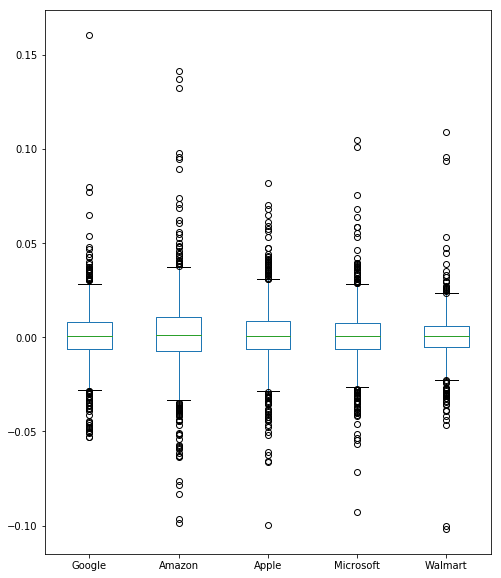

In [56]:
daily_returns.plot(kind="box", figsize=(8,10))

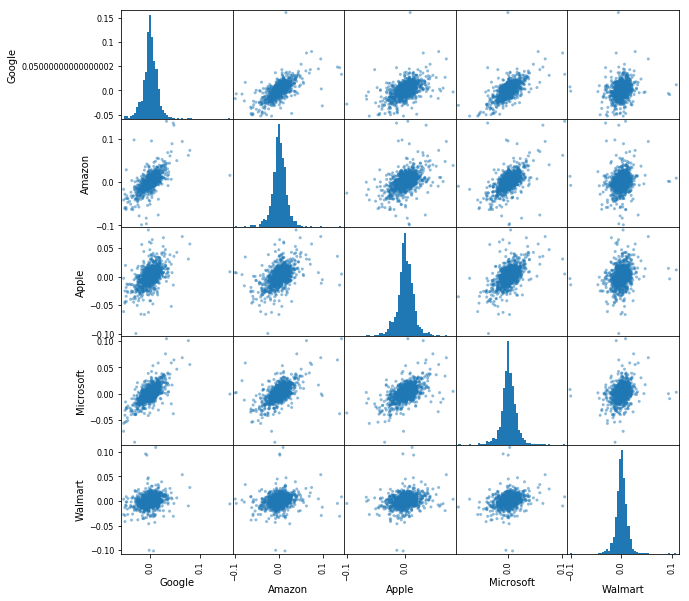

In [64]:
scatter_matrix(daily_returns, figsize=(10,10), alpha=0.5, hist_kwds={'bins':50})
plt.show()

### specific plot extraction

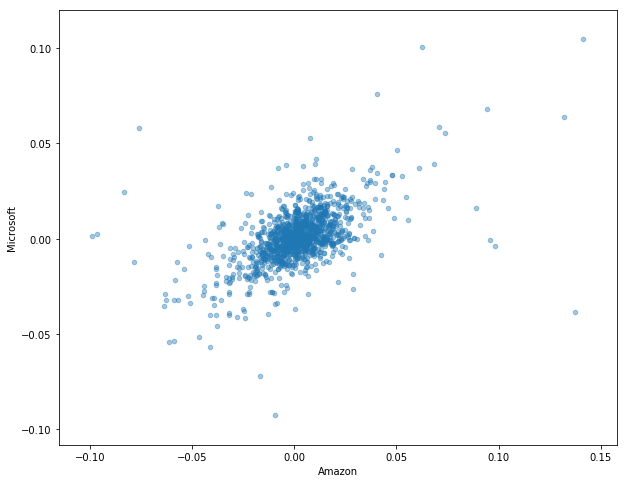

In [66]:
daily_returns.plot(kind='scatter', x="Amazon", y="Microsoft", alpha=0.4, figsize=(10,8))

# Cumulative returns

Investors want to review the annual sum of a stock

$i_i = (1+r_t)*i_{t-1}$

In [71]:
google['cumulative returns'] =(1+google['daily returns']).cumprod()
apple['cumulative returns']=(1 + apple['daily returns']).cumprod()
amazon['cumulative returns']=(1 + amazon['daily returns']).cumprod()
microsoft['cumulative returns']=(1 + microsoft['daily returns']).cumprod()
walmart['cumulative returns']=(1 + walmart['daily returns']).cumprod()

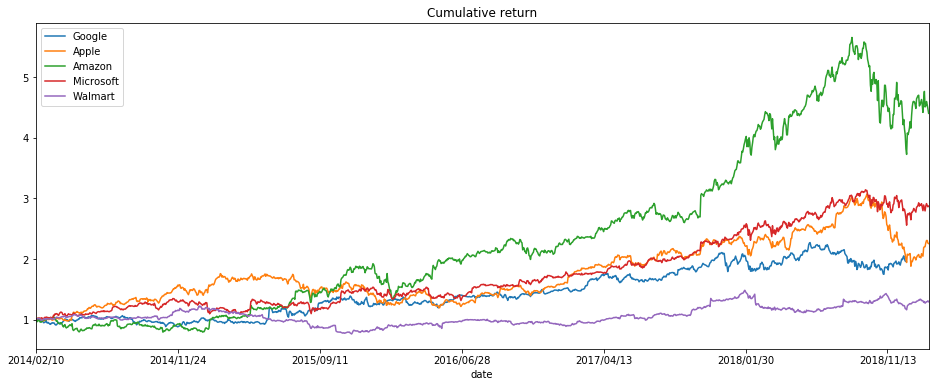

In [77]:
google['cumulative returns'].plot(label="Google", figsize=(16,6), title="Cumulative return")
apple['cumulative returns'].plot(label="Apple")
amazon['cumulative returns'].plot(label="Amazon")
microsoft['cumulative returns'].plot(label="Microsoft")
walmart['cumulative returns'].plot(label="Walmart")
plt.legend()

# Portfolio

In [79]:
portfolio = pd.concat([google['close'], apple['close'], amazon['close'],microsoft['close'],walmart['close']],axis=1)
portfolio.columns=["Google", "Apple", "Amazon", "Microsoft","Walmart"]
portfolio.head()

,Google,Apple,Amazon,Microsoft,Walmart
2014/02/10,NaN,75.5700,360.87,36.800,73.76
2014/02/11,NaN,76.5657,361.79,37.175,74.80
2014/02/12,NaN,76.5600,349.25,37.470,74.96
2014/02/13,NaN,77.7757,357.20,37.610,75.36
2014/02/14,NaN,77.7128,357.35,37.620,75.79


filling the column of google with the average price of Google for the past 5 years

In [83]:
#fillna=filling missing nan values

portfolio['Google'] = portfolio['Google'].fillna(value=portfolio['Google'].mean()) 

In [85]:
portfolio.head()

,Google,Apple,Amazon,Microsoft,Walmart
2014/02/10,804.150863,75.5700,360.87,36.800,73.76
2014/02/11,804.150863,76.5657,361.79,37.175,74.80
2014/02/12,804.150863,76.5600,349.25,37.470,74.96
2014/02/13,804.150863,77.7757,357.20,37.610,75.36
2014/02/14,804.150863,77.7128,357.35,37.620,75.79



## Average daily return

In [90]:
#pct_change = percentage change, (1) means one row up
portfolio_daily_return = portfolio.pct_change(1)
avg_daily_return = portfolio_daily_return.mean()
avg_daily_return 

Google       0.000400
Apple        0.000765
Amazon       0.001366
Microsoft    0.000946
Walmart      0.000281
dtype: float64

## Log return

In [92]:
#numpy is used to call the logarithmic function
log_return = np.log(portfolio/portfolio.shift(1))

In [94]:
log_return.tail()

,Google,Apple,Amazon,Microsoft,Walmart
2019/02/04,0.019657,0.028009,0.004344,0.028392,0.009649
2019/02/05,0.011576,0.016965,0.015492,0.013900,0.008720
2019/02/06,-0.027208,0.000344,-0.011246,-0.011161,0.000418
2019/02/07,-0.014924,-0.019121,-0.015910,-0.007194,0.011332
2019/02/08,-0.003328,-0.003105,-0.016331,0.003793,-0.011960


# 1 Single simulation

In [123]:
np.random.seed(101)

#stocks
print("Stock in portoflio: ")
print(portfolio.columns)
print()

# Generate random weights 
#1. put them into an array then randomise
#its going to generate an array first then random dummies will be filled
weights = np.array(np.random.random(len(portfolio.columns)))
print(weights)


Stock in portoflio: 
Index(['Google', 'Apple', 'Amazon', 'Microsoft', 'Walmart'], dtype='object')

[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698]


In [124]:
# we need to balance the sum of array = 1
# we are going to generate in percentage
weights = weights/np.sum(weights)
print("New weights are..")
print(weights)
print()

# Calculate the expected return
# 252 is working days a year excluding public holidays
expected_return = np.sum(log_return.mean()*weights)*252
print("expected returns should be\n", expected_return)
print()

#Risk (volatility)
#weights.T = i transform this into a vertical array
# cov = covariance
expected_vol = np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*252, weights)))
print("expected volatility should be\n",expected_vol)
print()

#Sharpe Ratio
sr = expected_return/expected_vol
print("Sharpe Ratio: \n",sr)


New weights are..
[0.26182041 0.28933544 0.01443678 0.08696357 0.3474438 ]

expected returns should be
 0.104021143212784

expected volatility should be
 0.16954839904081034

Sharpe Ratio: 
 0.6135188760334215


## 15000 Simulations

In [125]:
num_sim = 15000
#generate arrays of zeros below
#creating 15,000 rows and 5 columns using tupple
all_weights= np.zeros((num_sim,len(portfolio.columns)))
all_returns = np.zeros(num_sim) #1D arrays x 15000 elements
all_vol = np.zeros(num_sim)
sharpe = np.zeros(num_sim)

# now empty container(15000 x 5) is created and ready

In [147]:
for i in range(num_sim):
    weights = np.array(np.random.random(len(portfolio.columns)))
    weights = weights/np.sum(weights)
    
    #now storing all weights
    #specify the position
    # i means raw, : means all columns
    all_weights[i, :] = weights
     
    expected_return = (log_return.mean()* weights) * 252
    
    all_returns[i] = np.sum(expected_return)
    all_vol[i]=  np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*252, weights)))
    
    sharpe[i] = all_returns[i]/all_vol[i]

In [148]:
sharpe.max()

1.0643946907353037

In [149]:
best = sharpe.argmax()
best

13123

In [150]:
best_returns = all_returns[best]
best_returns

0.22995166524173952

In [151]:
best_vol = all_vol[best]
best_vol

0.21603984616165703

In [152]:
print(all_weights[best])
print(portfolio.columns)

[0.0025217  0.08609686 0.41891077 0.41318238 0.07928828]
Index(['Google', 'Apple', 'Amazon', 'Microsoft', 'Walmart'], dtype='object')


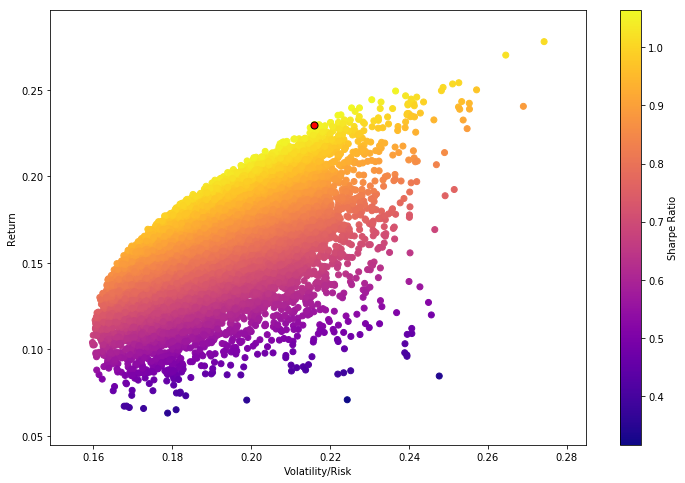

In [153]:
plt.figure(figsize=(12,8))
plt.scatter(all_vol, all_returns, c=sharpe, cmap='plasma')
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Volatility/Risk")
plt.ylabel("Return")

plt.scatter(best_vol, best_returns, c='red', s=50, edgecolors='black')